---
# OLYMPICS  DATA  ANALYSIS
---

In [1]:
#Importing the library
import pandas as pd

We can now create a Pandas dataframe using the `CSV file` to view and analyze the data.

In [2]:
# Loading the dataset
df = pd.read_csv("summer.csv")

In [3]:
# Returns the first n rows, by default the number of elements to be displayed is 5
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [4]:
# Returns the total number of null values for each column
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

## 1. In how many cities summer olympics is held so far ?

In [5]:
df['City'].unique()

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [6]:
len(df['City'].unique())

22

## 2. Which sport is having most number of gold medals so far ? (Top 5)

In [7]:
goldMedals = df[df['Medal'] == 'Gold'].groupby('Sport').count()['Medal'].sort_values(ascending = False).head()
goldMedals

Sport
Aquatics      1421
Athletics     1215
Rowing         890
Gymnastics     820
Fencing        552
Name: Medal, dtype: int64

<AxesSubplot:xlabel='Sport'>

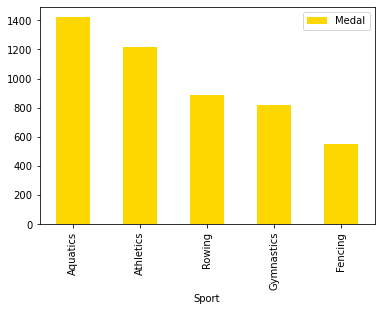

In [8]:
pd.DataFrame(goldMedals).plot(kind = 'bar',color = 'gold')

*Aquatics* sport has the most number of gold medals

## 3. Which sport is having most number of medals so far ? (Top 5)

In [9]:
Medals = df[(df.Medal == 'Gold') | (df.Medal == 'Silver') | (df.Medal == 'Bronze')].groupby('Sport').count()['Medal'].sort_values(ascending = False).head()
Medals

Sport
Aquatics      4170
Athletics     3638
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Medal, dtype: int64

<AxesSubplot:xlabel='Sport'>

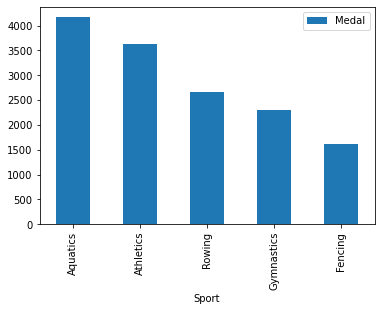

In [10]:
pd.DataFrame(Medals).plot(kind = 'bar')

*Aquatics* sport has the most number of medals

## 4. Which player has won most number of medals ? (Top 5)

In [11]:
player_Medals = df[(df.Medal == 'Gold') | (df.Medal == 'Silver') | (df.Medal == 'Bronze')].groupby('Athlete').count()['Medal'].sort_values(ascending = False).head()
player_Medals

Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
ONO, Takashi            13
Name: Medal, dtype: int64

<AxesSubplot:xlabel='Athlete'>

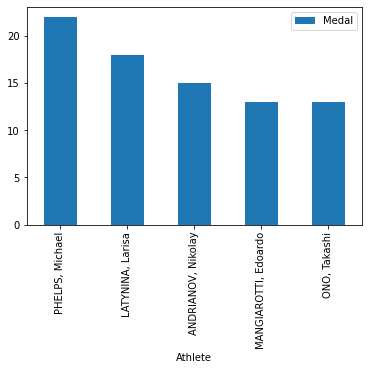

In [12]:
pd.DataFrame(player_Medals).plot(kind = 'bar')

*Pheleps, Michael* has won the most number of medals

## 5. Which player has won most number of gold medals ? (Top 5)

In [13]:
player_goldMedals = df[df['Medal'] == 'Gold'].groupby('Athlete').count()['Medal'].sort_values(ascending = False).head()
player_goldMedals

Athlete
PHELPS, Michael     18
LEWIS, Carl          9
NURMI, Paavo         9
SPITZ, Mark          9
LATYNINA, Larisa     9
Name: Medal, dtype: int64

<AxesSubplot:xlabel='Athlete'>

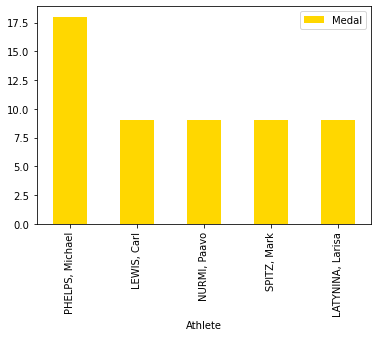

In [14]:
pd.DataFrame(player_goldMedals).plot(kind = 'bar',color = 'gold')

*Phelps, Michael* has won the most number of gold medals

## 6. In which year India won first gold medal in summer olympics ?

In [15]:
Ind_gold = df[(df.Country == 'IND') & (df.Medal == 'Gold')]
Ind_gold.min()

Year                              1928
City                         Amsterdam
Sport                           Hockey
Discipline                      Hockey
Athlete                AHKTAR, Hussain
Country                            IND
Gender                             Men
Event         10M Air Rifle (60 Shots)
Medal                             Gold
dtype: object

In the year *1928* India won the first gold medal in summer olympics

## 7. Which event is most popular in terms of number of players ? (Top 5)

In [16]:
popular_player = df.groupby('Event').count()['Athlete'].sort_values(ascending = False).head()
popular_player

Event
Football            1497
Hockey              1422
Team Competition    1147
Basketball          1012
Handball             973
Name: Athlete, dtype: int64

<AxesSubplot:xlabel='Event'>

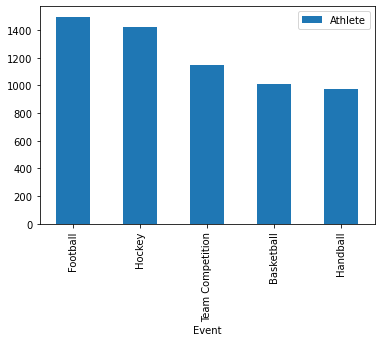

In [17]:
pd.DataFrame(popular_player).plot(kind = 'bar')

*Football* event was the most popular in terms of number of players

## 8. Which sport is having most female gold medalists ? (Top 5)

In [18]:
fem_gold = df[(df.Medal == 'Gold') & (df.Gender == 'Women')].groupby('Sport').count()['Medal'].sort_values(ascending = False).head()
fem_gold

Sport
Aquatics      589
Athletics     389
Gymnastics    268
Rowing        217
Volleyball    166
Name: Medal, dtype: int64

<AxesSubplot:xlabel='Sport'>

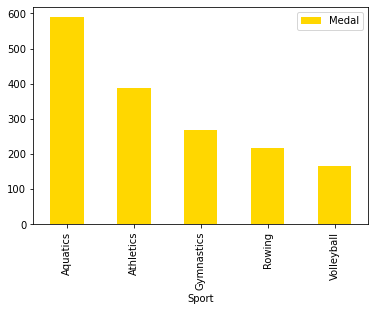

In [19]:
pd.DataFrame(fem_gold).plot(kind = 'bar',color = 'gold')

*Aquatics* sport has the most female gold medalists

---